# Rotationen in 2d

In [1]:
%matplotlib inline

## Warnung

Quaternions are the things that scare all manner of mice and men.  They are the things that go bump in the night.  They are the reason your math teacher gave you an F.  They are all that you have come to fear, and more.  **Quaternions are your worst nightmare**.

http://www.cprogramming.com/tutorial/3d/quaternions.html

## Rotationen in 2D
* Wie rotieren wir z.B. ein Polygon?
* Wann ist eine lineare Abbildung eine Rotation?
* Rotationsmatrizen und komplexe Zahlen.
* Hoffnung für 3D? 

## Unser Ziel:
* Wer interessiert sich warum für Quaternionen? Sollten wir das auch tun?
* Die mathematische Heimat und Verwandten der Quaternionen.
* Erste kleinere Anwendungen...

## Welches Spiel war das brutalste Game aller Zeiten?

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def pp(ax, point, **kwargs):
    ax.plot([0, point[0]], [0, point[1]], **kwargs)
        
def baseimage(a1, a2):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, aspect='equal')
    pp(ax, point=np.array([1,0]), color="b", linewidth=5)
    pp(ax, point=np.array([0,1]), color="r", linewidth=5)
    pp(ax, point=np.array(a1), color="b", linewidth=5, linestyle="--")
    pp(ax, point=np.array(a2), color="r", linewidth=5, linestyle="--")
    plt.grid()
    

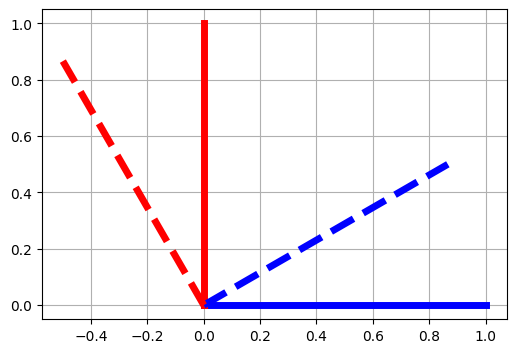

In [3]:
from numpy import cos, sin, pi
phi=pi/6
baseimage(a1=[cos(phi), sin(phi)], a2=[-sin(phi), cos(phi)])

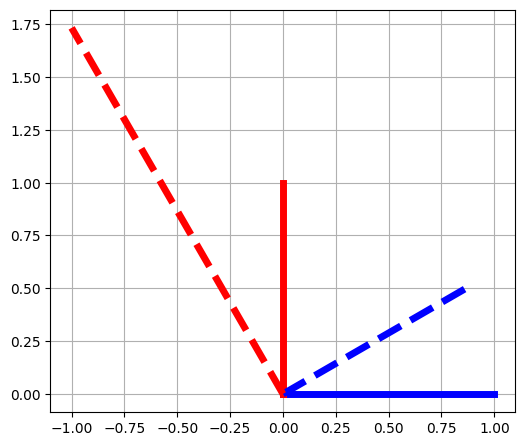

In [4]:
from numpy import cos, sin, pi
phi=pi/6
baseimage(a1=[cos(phi), sin(phi)], a2=[-2*sin(phi), 2*cos(phi)])

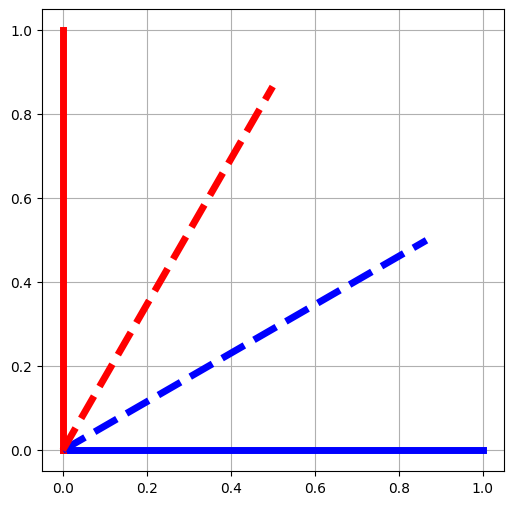

In [5]:
from numpy import cos, sin, pi
phi=pi/6
baseimage(a1=[cos(phi), sin(phi)], a2=[sin(phi), cos(phi)])

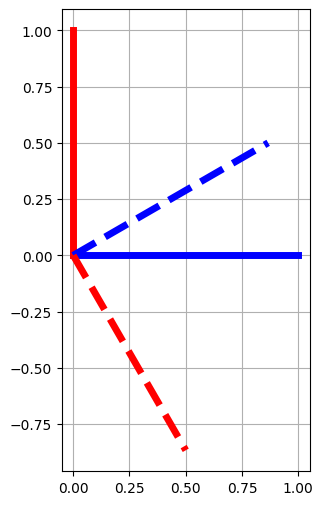

In [6]:
from numpy import cos, sin, pi
phi=pi/6
baseimage(a1=[cos(phi), sin(phi)], a2=[sin(phi), -cos(phi)])

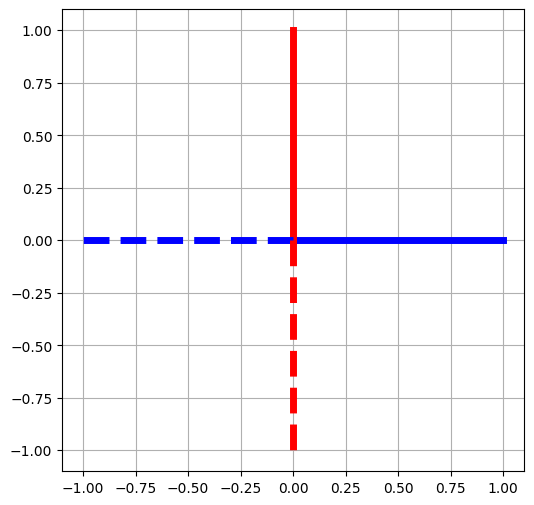

In [7]:
from numpy import cos, sin, pi
phi=pi/6
baseimage(a1=[-1, 0], a2=[0, -1])

### Die Gruppe $\textrm{SO}(2)$

* Spalten von A müssen orthonormal sein und $\det(\mathbf{A}) = 1$. 

* Teste mit $\lVert\mathbf{A}^{T}\mathbf{A} - \mathbf{I}\rVert < \varepsilon$ und expliziter Berechnung von $\det(\mathbf{A})$.

* Diese Matrizen bilden eine Gruppe (bzgl. der Multiplikation). $\mathbf{A}_1, \mathbf{A}_2 \in \textrm{SO}(2)$ dann gilt $\mathbf{A}_1 \mathbf{A}_2 \in \textrm{SO}(2)$.

### Die Rotationen in 2D sind die Elemente von $\textrm{SO}(2)$.


### Komplexe (Einheits-)Zahlen als Rotation
Wir können aber auch jeden Punkt $(a,b) \in \mathbb{R}^2$ mit der komplexen Zahl $z=a+i b$ eindeutig identifizieren. 
Die Drehung um den Winkel $\varphi$ entspricht dann einfach einer komplexen Multiplikation 
\\[
u z = z u
\\]
wobei gilt $u=\cos(\varphi) + i\sin(\varphi)$. Zurück ins Reelle per Real- und Imaginärteil.

$\textrm{SO}(2)$ eng verwandt mit den komplexen Zahlen auf der Einheitssphäre (der Rand der Einheitsscheibe).

### Komplexe Zahlen einfacher als Rotationsmatrizen, aber Schritt in höhere Dimensionen unklar.



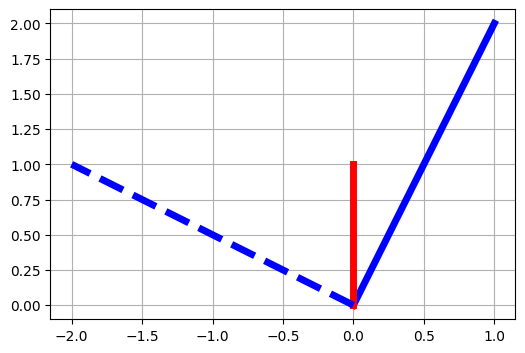

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, aspect='equal')
pp(ax, point=np.array([1,2]), color="b", linewidth=5)
pp(ax, point=np.array([0,1]), color="r", linewidth=5)
pp(ax, point=np.array([-2,1]), color="b", linewidth=5, linestyle="--")
plt.grid()

# z=1+2i
# u=i
# u*z=i+i*2i=-2+i  weil i*i=-1
# Rotation um pi/2

### Hoffnung für 3D?
* Rotationen in 2D beschrieben durch $2$-dimensionale Zahlen.
* Komplexe Zahlen aber nutzlos in höheren Dimensionen. Gibt es $3$ dimensionale Zahlen? Gibt es eine Verallgemeinerung der komplexen Zahlen für höhere Dimension.
* Gibt es $\textrm{SO}(3)$ verwandt mit $X$? Was ist $X$?
* Rotationen in 2D beschrieben mit nur einem Parameter. Wieviele freie Parameter brauchen wir für 3D?
* Matrizen verfügbar in allen Dimensionen (ganzzahlig), aber etwas unhandlich.


### Animationen in 2D?
* Wir drehen Punkte $z = x +i y$ um den Winkel $\varphi$. 
* Wir interpolieren diese Drehung mittels $\varphi(t) = \frac{t}{T}\phi$.
* Die Animiation ist dann einfach 
\\[
z(t) = (\cos(\varphi(t)) + i\sin(\varphi(t))) z(0)
\\]
* Eine Animation ist hier nur eine Hintereinanderausführung vieler, vieler Rotationen. 
* Gleichmässige Winkelgeschwindigkeit impliziert weniger **Ruckeln**.

In [9]:
# builder for so2 matrices...
def so2(phi):
    return np.array([[cos(phi), -sin(phi)], [sin(phi), cos(phi)]])

Kurzes Quiz
* Eine Drehung in 2D stellen wir als Rotationsmatrix oder komplexe (Einheits)Zahl dar.
* Was gilt für die Spalten einer solchen Rotationsmatrix?
* Was gilt für die Determinante einer solchen Matrix?
* Wie testet man die Orthonormalität einer Matrix?
* Schreiben Sie eine Klasse, die eine Rotation in 2D beschreibt.
* Multiplizieren Sie 10000 zufällig gewählte Rotationsmatrizen und untersuchen Sie, ob das Produkt auch wirklich eine Rotationsmatrix ist.
    
Der Zugang via Matrizen öffnet den Weg in alle höheren Dimensionen, $\textrm{SO}(3)$, $\textrm{SO}(4)$, ...
Der Zugang via komplexer Zahlen erleichtert das Verständnis für Quaterionen.

Die Rotationsmatrizen sind letztlich durch nur einen(!) Parameter $\varphi$ bestimmt. 
 
    

In [10]:
A=so2(pi/6)
print(A)
from numpy.linalg import eig
print("Eigenvalues: ")
print(eig(A)[0])
print("Eigenvectors (columns): ")
print(eig(A)[1])

# Eigenvalues come in pairs (could be 1,1 or -1,-1 or z and z conjugate)
# in partcular z*z(conj)=1=det(A)
# and also
# 2*cos(phi)=z + conj(z)



[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
Eigenvalues: 
[0.8660254+0.5j 0.8660254-0.5j]
Eigenvectors (columns): 
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [11]:
# stability
from numpy.random import rand
A=np.eye(2)

for r in rand(10000):
    A = np.dot(so2(r), A)
    
print(A)
print(np.dot(A.T,A)-np.eye(2))
print(np.linalg.det(A))

[[-0.96415345 -0.26534529]
 [ 0.26534529 -0.96415345]]
[[-5.10702591e-15 -9.36517308e-15]
 [-9.36517308e-15  7.99360578e-15]]
1.0000000000000013
